# Data Visualization

Alan Gabriel da Silva Duarte





In [ ]:
from google.colab import drive
import pandas as pd 
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

!pip install pyclustertend
from pyclustertend import vat 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/pokemon.csv'
data_set = pd.read_csv(PATH)
data_set.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
# Visualizando as informações do data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [ ]:
# Visualizando dados faltantes 
data_set.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


###Visualizando a variedade e a quantidade de pokemons pelo tipo 1
Ao analisar o gráfico concluimos que:

*   Água é o tipo com maior variedade de pokemons
*   Vento é o tipo com menor variedade de pokemons



water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

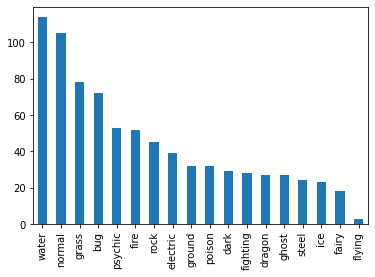

In [ ]:
# Visualizando a variedade e a quantidade de pokemons pelo tipo 1  
data_set.type1.value_counts().plot.bar()

data_set.type1.value_counts() 

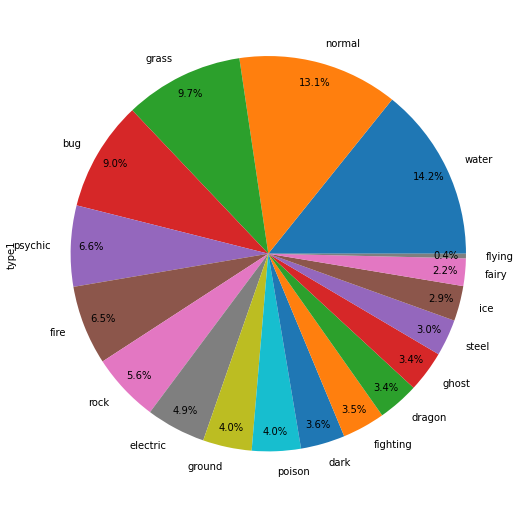

In [ ]:
# Visualizando a porcentagem de cada tipo

fig = plt.figure(figsize=(20,20))
fig.add_subplot(211)
data_set['type1'].value_counts().plot(kind = 'pie', 
                                       autopct = '%1.1f%%', 
                                       pctdistance = 0.9)

plt.show()

###Visualizando a média dos atributos dos pokemons por geração
Ao analisarmos esse gráfico podemos tirar algumas conclusões como:

*  A 7ª geração de pokemons possui em média o maior ataque, defesa e defesa especial
*  A 4ª geração de pokemons possui em média o maior HP. 
*  Houve um aumento na média de todos os atributos entre a 3ª e 4ª geração.
*  Houve uma queda na média de todos os atributos entre a 4ª e 5ª geração. 







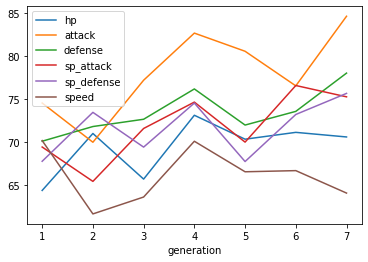

In [ ]:
# Visualizando a média dos atributos dos pokemons por geração
pokemon_stats_by_generation = data_set.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
pokemon_stats_by_generation.plot.line()

###Analisando quantidade de Clusters na base de dados

In [ ]:
# Separando a coluna de lendarios do data set 
y = data_set['is_legendary']
X = pd.get_dummies(data_set.drop('is_legendary', axis=1).dropna(axis='columns'))

In [ ]:
'Transformando X em um array '
x = X.to_numpy()

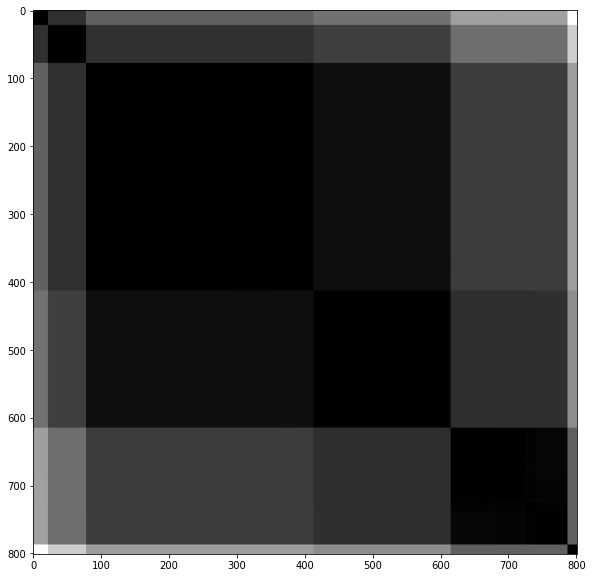

In [ ]:
# Analisando o gráfico podemos concluir que,como há 7 quadrados pretos na diagonal, exista uma hierarquia de 7 clusters no data set
vat(x)

###Gráfico ataque x defesa 

*   Parece existir uma tendência crescente entre ataque x defesa 
*   Os pokemons de aço são os pokemons com maior defesa
*   A maior quantidade de pokemons possuí ataque entre 65 e 69










In [ ]:
fig1 = px.scatter(data_set, 
                 x="attack", 
                 y="defense", 
                 color="type1", 
                 marginal_y="violin", 
                 marginal_x="histogram",
                 hover_name="name",
                 title="Ataque e Defesa dos pokemons de acordo com sua classifação ")
fig1.show()

### Relação Tipo1 x Tipo 2 x Lendário

*   Vemos que a maior parte dos pokemons não possúi um tipo 2 
*   Vemos a existência de pokemons lendarios mesmo sem possuirem tipo 2 
*   Vemos uma forte concentração de pokemons lendarios com tipo 1 psíquico e sem tipo 2







In [ ]:
fig2 = px.parallel_categories(data_set,
                              dimensions = ['type1', 'type2', 'is_legendary'],
                              title = 'Numero do pokemons por tipo 1 , tipo 2 e lendario') 
fig2.show()

### Velocidade por Geração : Gráfico de violino

*   Parece existir uma maior quantidade de pokemons com speed superior a 70 na 4ª geração do que nas outras. 
*   A 3ª geração possui os dois pokemons mais rapidos
*   A 7ª geração possui a maior quantidade de pokemons com menos de 60 de speed







In [ ]:
fig3 = px.violin(data_set,
                 y = 'speed',
                 color = 'generation',
                 box = True,
                 points = 'all',
                 hover_data = data_set.columns,
                 title = 'Distribuição das velocidades do Pokémon por geração')
fig3.show()

###Comparando attack de pokemons lendarios e não lendarios

Pelo gráfico percebemos que o pokemons lendários costumam ter attacks maiores. No entanto, percebemos também que o pokemon com maior attack não é lendário.


In [ ]:
fig4 = px.violin(data_set,
                 y = 'attack',
                 color = 'is_legendary',
                 box = True,
                 points = 'all',
                 hover_data = data_set.columns,
                 title = 'Distribuição do attack dos Pokémons entre lendarios e não lendarios')
fig4.show()



###Comparando 2 pokemons utilizando gráfico de radar 
#### No exemplo comparamos o Blastoise com o Charizard, mas poderiamos comparar quaisquer outros pokemons.


Charizard venceu em:
*   attack
*   speed
*   weight
*   Special attack

Blastoise venceu em:
*   defense
*   hp

Empate em:
*   Special defense












In [ ]:
a = data_set[data_set["name"] == "Blastoise"]
b = data_set[data_set["name"] == "Charizard"]

data = [
    go.Scatterpolar(
        name = a.name.values[0],
        r = [a['hp'].values[0],a['attack'].values[0],a['defense'].values[0],a['speed'].values[0],a['sp_defense'].values[0],a['sp_attack'].values[0],a['weight_kg'].values[0]],
        theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Kg'],
        fill = 'toself',
        line =  dict(
                color = 'cyan'
            )
        ),
    go.Scatterpolar(
            name = b.name.values[0],
            r = [b['hp'].values[0],b['attack'].values[0],b['defense'].values[0],b['speed'].values[0],b['sp_defense'].values[0],b['sp_attack'].values[0],b['weight_kg'].values[0]],
            theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Kg'],
            fill = 'toself',
            line =  dict(
                color = 'orange'
            )
        )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.name.values[0], b.name.values[0])
)

fig = go.Figure(data=data, layout=layout)

fig.layout.images = [dict(
        source="https://rawgit.com/guramera/images/master/blastoise.jpg",
        xref="paper", yref="paper",
        x=0.05, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ),
        dict(
        source="https://rawgit.com/guramera/images/master/Charizard.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ) ]


iplot(fig, filename = "Pokemon stats comparison")

In [ ]:
# Mais um exemplo poderia ser entre o pokemon de maior especial de attack e o maior especial de defesa
spatmax = data_set.loc[[data_set['sp_attack'].idxmax()]]
spdfmax = data_set.loc[[data_set['sp_defense'].idxmax()]]

print(spatmax['name'])
print(spdfmax['name'])

149    Mewtwo
Name: name, dtype: object
212    Shuckle
Name: name, dtype: object



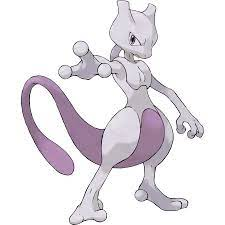
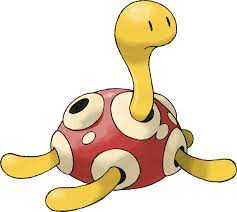

In [ ]:

data = [
    go.Scatterpolar(
        name = spatmax.name.values[0],
        r = [spatmax['hp'].values[0],spatmax['attack'].values[0],spatmax['defense'].values[0],spatmax['speed'].values[0],spatmax['sp_defense'].values[0],spatmax['sp_attack'].values[0],spatmax['weight_kg'].values[0]],
        theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Kg'],
        fill = 'toself',
        line =  dict(
                color = 'purple'
            )
        ),
    go.Scatterpolar(
            name = spdfmax.name.values[0],
            r = [spdfmax['hp'].values[0],spdfmax['attack'].values[0],spdfmax['defense'].values[0],spdfmax['speed'].values[0],spdfmax['sp_defense'].values[0],spdfmax['sp_attack'].values[0],spdfmax['weight_kg'].values[0]],
            theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Kg'],
            fill = 'toself',
            line =  dict(
                color = 'yellow'
            )
        )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 250]
    )
  ),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(spatmax.name.values[0], spdfmax.name.values[0])
)

fig = go.Figure(data=data, layout=layout)

fig.layout.images = [dict(
        source=
        "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBMVFBgSEhQZGRQUGRgdGxgTGxMaGhkbGx0ZGRwaHBgbIC0lGx0rIBkaJTcmKS4wNDQ0GyM/PzkyPi00NDABCwsLEA8QGxISGzIgICAyMDIyMjIyMDIyMjAwPjAyMjIyMjIyMjIyMjIyMDAyMjIyNDIyMjIwMjIyMjIwMjIwMP/AABEIAOEA4QMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABQYDBAcCAf/EAEIQAAIBAgQDBgQDAwsDBQAAAAECAAMRBBIhMQVBUQYTImFxgTJCUpFicqEjgrEUM0NTkqKywcPR8Adzk6OzwtPh/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAeEQEBAQEAAgMBAQAAAAAAAAAAAQIRMUEDEiEyUf/aAAwDAQACEQMRAD8A7NERAREQEREBERAREQEREBERAjOMU7imSLqr+IHbVWUEjn4iv3mg2HTkoXzp3Q+zJYj7yR4z/Ngcy9Ow65XVz9lVj7TSImosSPCqjNSUsbtaxJ3JBIN/PSbkrHDWZS9NajrZswAytZX/ADg28a1NBN2tjcSoOVabeZzKV88tyHPO2ZPWThxt4zGFXCLlJylmvfQXso02uQ2uvwnSe8HjA9xYq62uDrobgENzBseh6gSIputi5fMWN2ZtCTt8Py2ta3K02eBtnqVXvouRAOhALk+4qL/ZEWCbiIkQiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiaPFKhCZQbFyFBvYgHViDyIUMR5gQI56xqOX+QXVB1HN/3rafhF/mInqAoGgFgNgNhE2rSqoUqBwNNjb6Wt/AgH0zdZuCpPtgQecxgQrDi6APiG438xNvsx8NX/u/6dKeQJ87P1LVKifVZx5keFj9sklSp+IiZQiIgIiICIiAiIgIiICIiAiIgIiICIkHVrNUZjnK0lJVVUlSxUlWZmGtrggKNLam9wFCbn2V/M1PxozG26MzMrDoAxOU9CLa73k5SqBlDKbhgCD1B1BlsGSR/GKd0D/1bZj6ZWRj7KxPtJCJBBAz4xkbi8atKs1NAWoje21N+aoPmQc7fCTYaXCbtKorgMjAg6i02qqY/tAuGxKUVAZ6rBmVRq+csSS9wFKIKYF972uALy20qisAy7G/UEEaEEHUEEEEHYiQVfgCPikxFSnfu9VKZbk5gwBu4tYqg2Oin6iFkqi1BUL008FRfGGKaOtrMBfmtwdflXzMK2zWHI33/AEuD+otMHDLishG7Fgfy5Gb7XVf0moLqvVrEnzY3Y+lyTJXs/gWUd6++UKgO+TQlj5sQptyCrsSRJUT0REyhERAREQEREBERAREQEREBERAREQErFWp3Dmm4sCzFG5OrEsFB+pb2tv4b85Z5pcTFI0nFcA0iviDDMCOltySbWA1JtbWIKzxHioClaYzVCNFJ+xNvhXqf4mwOfs1xVadNMLXqAd2qqj1GALhV1BJ+cAX8x1sxkNQo2Q2QoEZlCm18vxIWtpnysoa1xmDWM+0x4lNyCGuCNwbEXH3/AN7i4muKvuHxCVBmR1YdUIYfcTBxTEFKTsDZrWUnkzEKpPlmIlf/AJXTWzVyiVCcocsEDmxPge9wSATkvcWO41LiGKerQZKZFcEoQabU84KurWa5CkWB1uDoNDqZOCNcahU3YqqhidSSFW533IuZucVwH8man3RJVlc1CxPicNTs1tlJzPcCw26TUwmDKAPXo5zuQHL5La+GnlANuoLMeXICSrYdayCpSdtmy3ZmQ33UoTpqPlsQR6g2/qo9ONWIDXsb2Niwut7g2F12Pl53IEksPxFWF/Xbr0IOoPlIig1TCuKjUicpa6gixDXDWa22uba5ttrJGlTV71BhjTDWN6VQ5yLcqToE9jr06Sdo8YllKMb6ZW1Hle+0uchuG8LoALUDNU1urVCNDe/wKFUMD1W4I6yZipX2IiRCIiAiIgIiICIiAiIgIiaPEcelFczXJPwqtszHoASB7kgCBuxKnU7SVz8NJFHm7ObegC2PufeZMP2q1tVpWH1Uzm9yhAIHoSZr61r6X/FpkPjqjO5QOyIlsxU5SzEXy5hqqgFTpYkka2BB3sJi6dVc1Nww2uOR6EHUHyOsjOK0KiOaqKXRrZlAJZWAtmA3YEBRYagqDY3JEZauNr1KVN3pO91UmzEvcDU2zE2a17Ha9rgjSY6tanYO9Q1GGqlmvryYIPCpsdwBNfF0cTXQ06SlS4tncMioDoWuVOZgL2AB1tew1n2t2ZxCi6VKbAD4O7ZG9nNQi9tLFRfTUS/itStirrl5k6n3mvPNUFL94rJl3NRWRR++wykeYJHnN3hvDWxC3pPlT+tFmU/k5P6jTz5TXYrZ4BQUhq7auxdFv8iIxQhemZlLE8/CPlFtjij5KbVR8VMFh1IGpS/QgW+x3AnlOC4jDi1Ko+IUtcip3KupNr2sEQrz5Ea/FfT2eE1q5KV1yUSCGGYZ3B0KrkPgBB1bNfewBOYZ6j6McvMGaeGrZa34axII6OAWB91VgfML53wjheQgq1QtTvTqBqlRrldQ+VmI8Sm/WzLtafayGysPlqUNfWrTB/QmFTZEwd4VYhz4WPgPtqh89CQeYP4STnJmu4UuabbVE2/KbEjz8S6+QlR7wmMCVVAPgqnKw5K3yN7/AAHqSm1jewyh1ap7tnU5WCsQR8rAGxF+hF5ZuC8WWupU+GqgGdfXZl6qf02O0zSpeIiRCIiAiIgIiICIiAiIgY6jhQWY2ABJJ5Aakzm/E+KMzNUb4n2H0qPhXytf3JJ5y3dsMQUwrBTY1GVP3SbuPdAw95z/AAdLvsRSpH+kqKCDzUXdx/40ebx+Trpj8lqb4RwXGVl713REbVQyvnYcjbN4R0O56Dnr8Qw1WiwWslr7MDdW/K330NjptOlTWxmFSqhp1FDKw1B/iDuCNwRqDE3Sbrn2Dxr03z0ms3O+zDow5j9RfS0vPCeJpXW66Mtgyk3Kn15g8jz8iCBz3iuBfDVTSYki2ZH+tL2vppmGzAeRsAwmTh3FXouKiC5GhXYOvNT0PQ8j5XB1qTU61rMs7HUImrgcUlWmtWmbq4uDsfMEbgg3BB1BBE2pycSIiAiIgRnEMMb96gJYCzKNcyi5Fh9QubdQSOlo7EUEq08t/C2Uhl5EEOrDrYgHppLJILHUDTqZl/m6h1H0Oef5XP8Ae65zayrEZSxrAlKi+Jd7cxyYdVP+4OoM18ZjBnGRGZwuyZbgE8yxAF/W5tpsZu8RpqygMNRsQSCOtmGomhRoqgst+pLFmJPUsxJJ23PIdJarSr4pe7NMI6sfBktmZVsLucmYBAhvmvYaAkHSFYgq6MVddVdLXF+l9CD0NweYlh7Oogq1DlUO6J4rDMyqWBW++UXU2/HNjiHZ6m5L0j3bnUgC6MepTSx31UjU3N4lR44T2gDWp4gBH+oX7t/Qn4D+FuoALSwSjVMO9JgtVMt9AwOZGPRXsNfJgCbGw0khRrNS8VIFgNTTBFnA5KGNlfe2wJtfTUSw4tUTWwmJWoi1EN1YAg2I0PUHUHqDqJsyIREQEREBERAREQKl/wBQmtRo671/9KtKr2ZA/l2Gv/WVLeZ7iv8A5Xly7d0QcJn/AKupTYfvN3f8KhlK4DUCYqg55VFHvUBp/wCpNz+XTP8ANdaiImHNA9quFd/Ruo/aUrslt208SeeYcvqCnlOdhuYnYZy7jeB7mu9P5b5k/I9yo9AQy/uTeL6dPjvpv9kuL91U7pz+yrEWv8tQ2APkraA+eXTVjOhTjzKCCDsdx5ToPZTi3fUsjm9WlYNfdl+V/Mm1j5g8iI3PZvPtYYiJhzIiICR3GyBh6pPy03I8iFJUjzuBbzm1XrKil2ICjcn7D3vpaQnE3qVwqqe7pBgxzLd3tqoynRADlbW501C21CNrVCxuZ4EzPgmpgkuXGm6qGHrl0I9ALecwswAJJAAFyToABuSZpp7oVzTdaigkpuBuyn4l89NQOqrLfSqKyhlIKsAQRsQdQZzxOK5tVpHJ1YhWPQhLc/Mg9QJtcH4y1KoVVmek5uaTWz021LZL8jYtluQbNYi1mXNLmrzXoq6lHUFWFiDqCJWsTRNFxTN8jfA5N81hcoT9YAvr8QBOuVrWPD11qKHQhlYXBH/NPSY8fhFqo1N9mtqN1IN1ZTyYEAg9RJKygsDie4fXShUJLdKbn5/JGPxdGs3N2lnlTp5vFTqgF6fhcWsrXGjAG/gYG9rm1yCbgyU4PiLAUWYkj4S2pKj5b8yu2upFjqbmKqZiIkQiIgIiICIiBH8ZwnfUKlIfE6MFvya11PswB9pyRibXUlTyPNTyNuoM7VOV9psCaOJdflqEuh8nJJHlZswt0A6zWHTF9OlcOxYq0kqrs6g26EjUeoNx7TalH7C8VsWwrne70/4un/zHM3fpLxJZxizl4So9vMJdExA/o2yP+WoQoNuZDhB5BmlumtjcKtWm9J75aisptobEWuDyPQxLwl5euUzLg8W9J1q0zZ167MDurfhP6aHcCeK1JkZkf40ZlbS2qm1wOh3HkRPBnXy9HmOn8H4pTxCZ6ehGjofiRuh/yOxG0kZyXB4upScVKTZXGnVWH0uvzL+ovoQdZeuD9p6Vayv+zqfSx8LH8D7H0NjvpbWc9Z446xYsMw16yorO5sqgknoBMsh8XVzvl3SmR6M41v5hf8V9iomWGAZ6jCpVBAHwUzbwfia2hqHrsoNh8zNnaemMxM01FfDKxxs5Ven1dbX+hvH9tHX0Es95Ve1rgVKIG9QNf0phv86srWfLSpjSecTRzAWOV1N0f6WFiPUXAuOYnlHmYPO35x6E7wPimS1RtKb/ABryRwbF79AQQ3UWPLW6Tm/CHu7p1ysPX4W9tF+5lz4LV8Jpc6VgOuQ3yfazL18N+c4anK82pyovF4haldnQDIimnmG7sGJb1VDdQerVPIn6wvYgkEG4YbqRsR/yx1B0MhaeJFPDrTOYd2qozJbMFpkI7Lf5sqsR52lgxWHVFStSYtSawIN2y5iArgnxWvoQb2uDplNyN/h3Eg/7N7LUsdB8LAfMt/1U6jzFiZOU1tKoFguzo45Otw1/3SunzAuNpZOH43vAbjKyGzDexsDcHmpB0P3sQRJYN+IiRCIiAiIgfJVe3XDy9Fa6jxUCS3/ba2f7EKxPRDLXMboCCrAEEEEHYg7giIsvHIKBYEMrFWUgqy7gjYidG7PcbXELlay1kHiUbHlnW/yn9CbHkTQMbgjh674c3shuhO7I2qte9zpdSebI0y0SwYOjFXU3Vl0KnqP4W2IJBuDOv1+0drn7R1aJWuFdpQbJiLI31jRG/N9B/TTcXAllnOyzy42WeVD7cYLJUWuB4aoysfxqLqT5lAR+55ytKZ1TiuAWvSei2gYaG1yrDVWA6ggH2nKyrKWRxldGZXXXRlNja+45g8wQec6Yv5x1+PXZx6nkjkZ6iadAV6iLlpVHS9lVEqVUTMxCqMqsALkgaCX3C0BTprTUkhABmYksxG7MTqWJuSTuSZRMDTD4jDoRcGqD700eqP71MToEzXHfkzdYDTy7gbmeBVXqJllltKx2sb9pSA+VKhP7zU7f4GliqYhRz+0pvF8T3ld25KFQdLKCxP8Aadh+7LGseWoDPeaeImnZI8AP7b9xv8Sf/stvDny106OrrbqRlZSfQK/9qU3hNw7vyAVR66s36FJauGtnxFID5FqOTy0AS33qD7GY04b8tKv2frKxRaeanmurZlsRe4zBiDm62BuddzPXEM+HRMIj2ABqVGsGzZ6juyDN8KaOOtiuosb3SR/EeFU61i9wy3symxANrjW4I05gzPWVHxXFe8q0xRs3d3Zyb5RdqYsGGhbu2fTWwYXtmUy09nKhdqrgEL4F15soZm9rOv69Ju0eDUFp913YKkliWuWLEWL5jqGtpcWsAALAATawmGSkoSmAFW9gPM3J8ySSSeZMWjZiIkQiIgIiICIiBWO2XCu8piugvUo3NgLlkPxLYbkWzDc6ED4pUcObgEag9J1SUPtDwruKmdB+xqnS21NzuvkrakcgbjTwidMa9Ovx65+IwGSvBuMNQspu9H6eaea+X4ftbYxVovOlkrtrMs/XScPiFdQ6MCrbEf8AN5V+1nAi98TRF3C2qKL3dRswHN1GnUjTUqomhwXihoP4j+xc+MfQdg49Pm8tflsb7ONlzXnsua48rX1Gx5ifZaO0/ZxkzYjDqWXd6SAlh1amo+Icyg13y3NlNWRwRcEEHmJuXrrnUre4Ig/lNL1e3/jcf7y6O4UXMouAqFa1Ij62/Wm4/iRLRVqlt5NMb8vlVyxuZhM9zXxWMp0wDUYC+w3ZvyqNT7TLD5jMUKVMuRcjRR9THRV9zz5C55SuoDbU3JuSepJuTblckmMbijUcOdFW+RNPDfQsbaFyNPIXA3JPgPNx1znjJPjE6BRdjoB1PmeQ6npML1TcIozO2yjf1J+VRzY6e5AMtgcFkuzHNUbcjYD6VHIfqTvyAdNa4zYahkQJe5G56k6k25XJOnKWbsfQOV65GlQhEvzWmWBa3K7s48wqnnIHC4Zq1QUEJBIzO4/o0vbNfYOxBCg8wTYhGEvtCitNVRAFRFCqo2CqLADyAExquNZoiJlCIiAiIgIiICIiAiIgJr4nDrUQo65lYWIP+429RtNiIHPOJ8MfDtZyWRicj/VzytbQOB7G1xzC6U6Pi8OtRCjjMp3B+4IO4INiCNQQJS8f2fxFI+AGrT5MuXOo/Gmmblqlyb/COfXO/VdsfJ6qNEunZSuWwyZt0Lp7IxVffKFlNFJybClVLfT3dQN9mAt6mw6mXngWBNGgtNjdvEzW2zOxcgHmBmyg9AI3Zw+SziTkBxjsxRrk1F/Z1Tu6AWY7eNNn2GujWFswEsE1sZiVpo1Rr5VF9NSegA5sTYAcyROTjLxz48Fq0cQocqwQF8yE88yqGUi6k+M7keDeSdjJHuWYMz/G5zNY3ANgAoPRQAt9L2vuTMFDhxqOKbfAdX/J9PkW29M1jcTVrdvfKp4zj4fw4eooGo7zwsdNPAp0/eNx5EG8jKapmJBzVG+Jiczt6k6kC+g2HK07M9BDuqn1AnpKaqLKAB0AtH2JvnpynC8HxNT4KD+rKUHrmqWBHpeTdPsRWZGNSsEfKcq0xm8VvDdmAFr7jL6Eby/T7H2pd2ub4PBotPvKa+FlD6XLMCtwSTqxtbczNhsO9VzRolc4AZi98qKSQGYDU3s1l0zFTqACRIcOS1GmvSmg+ygSQ7MYUK+Iqcy6IfREDj/3THU6kuFcOSgmVbksbu7fE7WAubeQAAGgAAEkIiZZIiICIiAiIgIiICIiAiIgIiICIiB8n2IgJB8RfPUCf0dMhm/E+6j0UeL1K21Uzc4tjTSpllANRiERTexdzlW9tcoJuxGyhjykZhlCg0wScgGZ2tdma7MTbTMT4j+eWD3WqBVLMbKoJJ8h5c5I8NoFUzOLO+rDTw9FuOg35XLHnInAqK9QHenSKsejN8SD0Gj9b5eRlki1a+xESISK4/jO6oMQbO/gTa+ZrgEDnlF2I6KZJsbanYSj8YqtWrd6qu1FEC028IU5vE9QKSGN/CAbbJ4dGN7Bs4asCMoAAAFgOQ2Akz2eUBavU1ST/Yp2/u5ZU8PXt4lP/OhHI+UkMBxLuqhqWJRwocC5K5b2YDnYHYbi+5sJqxaukTHTqBgGUgggEEEEEHUEEbiZJhCIiAiIgIiICIiAiIgIiICIiAiIgIiaHEcelFQWBZnOVVUXLGxY+igAkk9OZIBDQ4k2euq/LQUty/nHBUW6Faee/lVE0+IuAmUD+cax9LXa/qq5fcTNg1fLmqEGo5LPbbM3yjyUWQX1somLHrsel/1t/sJr0rc7LZe7qEMCzVXzAbqVCoAenhRT7ydlIweJZKgK2BWog0+ZKhUMCOerPb8S+t7vMoREQNPilEvSdQLllIy6eIc116i495W8TjQwso36y4TQr8KoOxdqalm3I0zcvFb4tNNZZRQKdVWrVVRgcipmAK3D+O9wNQcuTfll6TODL1W4bRdBTamuRRZQoy5eXhK2K+1pUeLcLqYdi+r0N8/zJ1FQD5eYcab5gLZm1KvX3h3FKlA2UZ6ZNyhIBFzctTJ0B55ToTzUkkzy9p8MdCagOlx3Nc2/eVSp9iZVpsYZKd7vmvyszAfZSL+8WHFpHG6HV/Xuq9vc5NPeb1CujqHRgynYqQQfQiUzE4hUqUmpMRmdldCWKsvd1H+EmysGRTmAvuOclezzZ6taqtshWmpykZWqKahY/mClAT0sPl0zYLJERIhERAREQEREBERAREQEREDFVqKqlmICqCSToABqSZCOxdjVYEeEhFIN1TQnTfMxAJH4VG4udjtAbLTZv5taql72tYK5Qn0qd2fUCab8RpqLlhbz0/jLFjPMWIpZ1y3seR3t7TBQTF1HZkpKlM5QGrEqxsDd1pgEnU5bNk+G+otM9bhGK+JK6Ej5WRlDaHTMHOXW2uU+kvRqpwalmFR2qM6kEE1HUCzBl8FPKrWIBGYGTvDcSWDBtWptlLWAzeFWBsOeVxfbUGwtIJDiycpw9QHqzUMvrmFQ6e1/KTfCcEaanOQXds7kXy5sqpZb8gqKL6X1Nhe0lKkYiJEIiICIiBBYjs1RY3QvT8qRXL7K6sFHkthPA7Lp/X1v/Q/+uWCJeiLw/BaCEMUDuL2eoAxF97aWXYbAXtJMCfYkCIiAiIgIiICIiAiIgIiICIiBixPwN+Vv4Gcu/wCmP8+/5qn+cRA6tERA+T7EQEREBERAREQEREBERAREQEREBERA/9k=",
        xref="paper", yref="paper",
        x=0.05, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ),
        dict(
        source=
        'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBUTExcTFRUXGBcZGhgYGBgZGhgaGhgcGRgaGRgYGRkaICskGhwpHRcXJTUkKCwuMjI0GiE3PDcwOysxMi4BCwsLDw4PHRERHTEoISkyMTEuMS4xMTkxMTExMTMzOTEyLjExMzEzMTEzOjExNjExOTExMTEzMTExMTExMTExMf/AABEIANQA7QMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABQYBBAcDAv/EAEUQAAICAQIDBQQFCAgFBQAAAAECAAMRBCEFEjEGE0FRYSIycYEjM0JSkQcUYnKCkqGxFSRTY3OistEWQ5Ph8DREg7PB/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAMEBQIBBv/EAC4RAAICAQMDAgQGAwEAAAAAAAABAgMRBCExEkFRBRMiYYGxMkJxkcHwFaHxFP/aAAwDAQACEQMRAD8A7NERAEREAREQBERAEREAREQBERAPmaXFeIpQgZ8ksQqIo5ndj0VFHU9TnoACSQATPfWalKq2tdgqIpdmPQKoyT+AlX4fW7u2ou+tfIVf7GvOVqG+M7AuR1b0CgVdTqFTHPd8I7hByZs51Nx5rLDUnhTVjmx/eWkZJ9E5QPNus8V4JRkEpzkDHNYz2t82sYk9JKI+B0nyTMudsp7tssxgl2Io8DoHu1InrWO7P4pgifVK3VfV3uQOiW/SqfizfSZ9ef5GSLnaazmVZXWVvMZMkUIy5RscK47zMKr6+5sJwvtc9dnj9HZge1+gwVtjgEDMnZVb6FsUo45lPUH/AM2Pjnwm7wDWsG/N7W5mC81dh62IuAwf+8XK5P2gwP3gNXR6/wB59M9n9yvbT0brgnoiJplcREQBERAEREAREQBERAEREAREQBERAEREAREQCt9sGFndabwd+8sGT9XSVbG3XNhpGD1BafCvPLiL82tt64SqlR8Wa1mIPqOT90TOZ836la5XteNi/RFKGfJtJZPo2CaeYzKiulgl6EeHF+LpS1KvnFtgqVtsKxViob4lcfEzZ5pBdudC1+itVQS6gWJy7tzoQw5R5nBHzkxS5KqSMEgEjyJG4ieHBS77p/3+8BbNo1O0VT2aa1amZbOQshUkHnT20GR5soGOhBIM0eHcTbUaKrWJtYgFuB9+rIsrHkGAsT4PJua3DNAlCGpBhCztjrjnYswHpljtOq7elJLlNNfz/B5KOX8sFxqcMAw3BAIPmDuJ6SI7HsTodKW69xTn492sl59YjMERE9AiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIBS9fqOTXXox6rTYvnylWT/VW82FYGavbygpqKLx0dXobb7QzbWc+Awto+LCaVepInzfqFOLm/O5folmCJiJGrrPWZOvModDJ8kjEhb+OKhIJJI6qis7D4qgJE107Qq9ncqLTYRzcgpu5sZxzYCbDIO/TaSR09kuE2cucVyywswHWRnE9U7laKfrbMrXsSBtvY2OiKNyfgOpGc6XQ6u4kCk1L/AGlxUA/CtGLn4NyfGWLs3wFdKGZnNtre9awA2+5Wo9ysEZ5ck53JJ3mhpfT5OSlNYX3ILL0liPJK6Oha60rUYVFVFHkFAAH4Ce8RN8pCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiARnaHhw1OnspzyswBRsZ5HUhq3x44ZVOPSUWhiygkcrbhlPVWBw6n1DAj5TpkpvarQ93eLB7lx5T5Laq7H0DouPLKDxeZ/qFPXDqXKJ6J4ljyRGIn21ZHhMrSZhZLpqtitQtajLMqIoGxexgq5x4czZJ8smXzgPCU0tXdpkknmdz71jnq7Hz2AA6AAAYAEqvDNNnWaUHPstbZ6exW1e/ztB+XpL6JuenQSg592UtRL4sCZiJokAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAYmpxTRrdU9TbBhsR1Vgcq4/SVgCPUCbcTzkFL4c/eVhnXlcFksG/s2IxSwDPhzKcHxGD4zY7oT11mn7vVWAe7eotA32srC12HyGUNO3mrHxjE+V1dXtWtLjsaVUuuOTXpULqtM+OrPXny56nbP41KPnLfKbxViqo4OOS2lyf0VtQ2f5OaXKbHpc+qnHhlXULEzMRE0yuIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAYiRl/Ga1JRA9rjqtSlgD5NZsiH0ZgZp6ziur5CatH7X2RbdWnxz3fOPln8Jy5Jcs9wyfic71XGtaWWu9207tnCV1pyN1OFsbvA7ADoGU43Kjw+P6Ke0l3axz/AHltjD5KWIX4ACee4uxPDTSks5R0eJyi/R1K4Ralssb3UrRWY+BJPRQNssxCjIyd5Lafs5q2GzijyC23sfmtbIoPwYzz3Uez06jzJFm7TrhtO46i0qfVXqsyP3lQ/Kath3Mrur4fq6NRo67NYbqzZY3dsh5hyU2YfvHd3O7AYz9oSw39Zh+qYlNNeF9yXTrCwanFqjZRbWOr1uo+LKQP4mWXgmrF+nquHSyuuwftqG//AGQOZp9ke0Bqp7qzTXCup7a1tQJYpWu10A7tGNgIC4wEPSS+kzx1RfyONSuGXeJp6DXV3rz1uGHQ46qfusp3VvQgETcm2VBERAEREAREQBERAEREAREQBERAEREA1eIapKUNjtyqMZO56nAAA3JJIAA3JIAlF7cdqKqR/WWY5AKaJCFdwejalxuqnHuZA6g8/QffbbtAaqrNWPaCOaNIhHstd7SvqDnqFxYq+iMQfbGOG6zUO9jWu5Z3JZ3Y7sT1JM4fxbHvBctT+UrWk/RdzTUvu1pWCoUeBLdfly/Kdn4be701WWJyWNWjOngrMoLL8iSJyn8mvYZ7HXU6pClakNXU4w1rDdWZTutYO+Du3w69Ze6V7WuIkkU+5qcd0ve0WL9rlLIfuuo5kYeoYAyoajiZWprWYhQhc48gvN0HpLTxziPJRa3XFb7eZ5TgfjiVHU0qUSs+7z0qfh3tYPyxOYFyjZSZcOyfDDRQGsAF1gD2nyYjasH7qA8o+BPUmTGZkz4aGyrzyV3WZt15P2aK1rX/ABLSLLNvREp/fM2bTkmeHD29q4n3u+tDfJsJn/4xXNiYWrscptfP7FuqOIo+MTn3Cu0lulvtVvpKTde3JjDKDdZ7dZ25lJDbHqc4Ixg3fjvEF01Fl7dEUkerdEUepYgfOUrWaVb+G0aivJeqsFiTuV6Xg42JDKzfFNust+mweJS7bI8m49SjL/hcl1KXBdRS/LZgclqjIIz7lg250zkFTuPDlYAixdn+KfnCHmASxMCxM55SejKduZGwSrYHiCAQQOL8H4o+mbmT2kJzZXnZ/NlJ918ePQ9D4EXvRcUTFeuqbKKMWYz7VRP0isv3kxzAdQVI+0c60JY27EF9DgzocTAMzLJVEREAREQBERAEREAREQBERAMSP7RXvXprnr98VtyfrkYT/MRJCUjt/rjc35pW5Xkw9hBwOfHNVW2N8ZxYw22CdQxnknhZOoRcpYRM6nglFmnXTWVrZUiqqqwzjkHKpB6hseOc7maPCOymi0zB6tPWHHR2y7r8GsJI+UkOEcTr1Cc9bbjaxPtVt4o6+B/gRgjIIM2LvGUnJ8EuDx1OoCj1kU95OZnWsASSwCjqSQAPmekqXGu0feZp0eWY9bgMqB492D75/SPsj9KEjuEJTeInr2k13eWLpUOTzK1p+6AQyofU4DH0A+9PriFJeqxFOGKsFPk2PZPyODNPgPC+5XLbuc5yckZOTkncsTuTJJ3AnSNGNajHp/cvPDNWt9Ndy+7YiuP2gDj+M9yJUOwvEQlj6RjgHmtpz5M2bax+qzcwHk5xsst5M8lsZsouMullW47SdPc94H0VnK1h39ixVCc7eSFFQE9ByZPXIwNeZaGErvGeyOnuBGLKweoqsetT1z7Cnk3yc7byjdpI2y6s4O42OKwcw/KP2l/OHGmrOa0b2+Xfns6Kox15T+JPpLr2S4eaNJVS64blJdTvg2MXZT82InrwnsdpdI3PXWS46O5LMP1c7L8gJJWsVBOMkZwPPylyEYQgoQ4RE8t9TOTBPY5djgFd9wcbb56jaXqmysVjVVIBVYv9YqXG22GsCjbvE3DY3ZR4kLITRdkbxSOayvnCj6PDHJxuDZzbEnx5Tj1mlwPjDac8w3rbeytts7Y5gfssBt5HGD4Ed9y9YldBOPKR2jsnYW0WlZjktRSSfMmtSTJSc+/I9xsWV2aQk/QsWpBxkUsx5UOCfaQ7HyDIJ0GW08oy5RcXhmYiJ6eCIiAIiIAiIgCIiAIiIBD9ouJNSq10qGvtJWpWzyjAy9j437tBucdfZUbsJVuLcEuoDXd4bwSz3AoA+T1dAnvKMY5MFuUDBJGDYFHPxC1zjFVNdaeYa1mst/FUo/CScr2T3wTVNxfUjm1mnrtK2gkNgFLK2KOAdxy2IQeU9cZwZmxNQf8A3upx5E1/z7vJ+Zm7xrRDTajkX6q3nsqG+EcEGysHyJbnUergbKJr2vicGlCMLF1YNH+he9cIxt1Fh3VbLWKjlx7ZBPKijb2gPgCSAZjU8Bs01L3E1ciLzuiK4IUbswcn2sDJxyjOJI9iLawtzM6Cw2AMCQCEWtSg/Vyzt8XaePajj9VqNpqmFittbYpBrCg+1WG6OxxykDYDmyQcAiBzm7OmG2/BGzU1j77Tx1Ou8Afwmjdqttpw2acKnyNU5yCGKupDq6n2kYdGHr6HYgkHIJEuvZftbXeFqvK13dBn2UtPnWT0Y/cJyN8ZG856xzPl1BGCAQeoO4PynmT27SRsXh+TtkwZyThfGtTRtXc/L/Z2fSJ8ub2lHopAks3bzUBcGulmxu2XUfHlyf5zzBmz0dse2S5cRcSs6fiy3al6K/aFa5tfw5ieVa0PiRhuY+GMdc4qfGe0Wp1A5WcVr4rWChYeRcktj4ETV4Lr30zlqwuCoQoQeUgHK4x0IyfxM7WDlaSfTnv4Oh6q5a0axzhVGSfh/M+ErH5P+CC3+tWLkczCpD0yCQ9hHiebKr5AE+IxD8Z4pdq+WskDmZVREBxzMeVWbJJblyT5DGcbZnT+GaVKaq6kGFRVVfgBgRwjiUZVLpfLK/2n4byt+d1F67q1bmassrWV49tG5ffwBzAHO6gTz4P2m1NRB7w3V9TW+CxXqTXZsebB2DEg4A2zkT97b/CUPTr3L2VdBVYyjwAQgWVj4BHUfsyKyU4pSi+CFRTeGdn0t62ItiEMrKGVh0KkZBHyM9pC9iVI0OnzkZrVgDsQre0q49FIHyk3NFPKK4iInoEREAwIlYt1duptcJYaqEYoCmO8tdCVsyzA8lYYFRy4YlSc42Oq/CGrPNVq9WjebWvcp9DXfzjHwwfWVJ6yuDafYkjVJouMSpVcS16ZB/NrvI4soPzwbB8wB8J6f07rNs6SjpvjVP19M0dIWtof5kHVNdi0xKt/TmsbYafTp+kb3fHryClc/vCeLvqLRi2/bxSlTUp+LczWD9lx1nFnqFEF+LP6Hqom+xGdoOM26fW2ihO9Jal7RvhEFZDKGzjvDyphd/e3wN5a9FrUtRXUgqwDKR0IIyCPlKtqdKtfsooUDoFAA39BPjs1qigsp8K7Dyb59iwCwfABmdQPJRK9Wq96T2wTSr6EiZ7dVM2jd0GXqK3LgZJ7s8zqB5tXzr+1KNdxEEZHyl5/O8gg9CMEeBB6icl0rci93nPITXnz7tim/wC7LGXguaFpycX+pJapktwXRGx05lU4+GRMG/ymsLBMhiSFRS7sQqovVmPQD/c7AZJwBPMtmpiEU2fVluBknA8ztN3h/B9RcAa6bCp+0cIvxBsI5h6jMuPZPspXQFtv5bL/AHs9a6j92sHxH3zud+g2lq5hBnWeoPOK1t8zm/8AwZrOuKPh3r5/+vH8ZGcS4RqaMm2iwKPtrixPiTWSVHqwAnWHuAEjdTrs9P8AtBEtfanvh/Q5O1nlv6zxYy1dqeBB+a6lcWdWrXAW3zIHQWdd/tdD4EVFbMgEdDvGC/VqY2rw/BgxBmMwdkr2Ro59WhIyK0d8+TEBFz8mb8J0lbdpSvyepvc/+Gg+Qdj/AKxLBxrUd3RY4ODykKfJm9lT+LCGY+olmxlR7Z9otUnt6bArrY87YDF+XqcEbV5yMjc9cgbyzcF7PLrtRbbY30PLSzVgfWEpnDP9zAUEAZPmB1ryqAAoGwGAPQbYmz2c4hdoWb835SjkFqXyE2GByON6/wAGX9HxnFd8G8SX9+ZXlB9jsAmZVtD2zoYDvVtpJ2yyl0/6lfMFHq3LJ3R8Tptwa7a3z05HVv5GX4zjJZTIWmuTcieVt6ruzKB6kD+c0b+P6RNm1NOfLvEJ/AHM6ckuTwk5mQ9HaXRu4rXVU852CGxQxPkFJBJkvCeQUjstYBpkTJzWXrfPXnrdksz68ytv49ZJtbPjjOhamx9Qis1dntWooLMrKoHeIg3bKqAygZ2BAJzPLT2LYodGDKehG4M+Z1lVlU3nhvZmhVKMoryfZMATOJmUCYwBMzV1WvrrYIzjnIyK1y1jDzWtQWb5CbGl0l924XuU+9YuXP6tefZ+LnP6Ms1aW21/DH69jiVsY8sjeMWAELgs7YCIoy7nyVR19T0A3JA3kbwBXJtufCl+Ve735q+65gy2Z/5nMxBxtsOvU3zhnCq6OZlBLtjnsY8ztjwJ8F/RXCjJwBI/jfAeZ2voIWxgOdDkJbgAKTj3HAAHOAcgAEHC8u5RofajnOZf6Kkrup/IiuecuvYGy0jobbSPna8v/aLW2aWhrWpsVhsMrlFY5Cl7FJRVz459OpAnOqU5VAznA6nxPifmZI00ty7olmTl2PUGT3YLS8+pNzdKk9n9e3mBPxCKR+3IAGWn8nto+nT7Wa3+RUr/ADQzxFjVt+2XqvU+s89dxFKkL2OFUblmIAHxJmna4VSzEBQCST0AHUmQ7u1zixhhF+rQ9c9O8cfeI2A+yCfE4EVlsYLLMuMXJ4RuN2godghtUE+6GynN+rzgc3yzNsmQvE9Al9TUuAVYEb+B8GHkQd5WPyacbsFx0Vrc49sISclWQ+0gJ3KkBiPLl9dlFiui2tmj2ceho6GonPe1OkFOpdV2VwLVA8OYkOP31J/bnQ5Se3zA6ioAjK1tzDxHM45M+nsNJSbSyasWCvmYxPqJ4a5avyf/AFd3+KPw7tP9jJLtlo2u0V1aDLFMqPFuVg3KPU8uJCdh9YldlldjqneBWQsQoJTIZcnbOCpA8eU+Utel1Pe7UK1xP2q/qx+tafYHwBLeQM7SedjF1CxOSZz/AIHfaKqxfW6Fsit3BHeBfjuHwOhxkDIzviZ0o3l803ZOt1c6vFzuMYHMEqXIYLVuCGBAJs2YkA+yMKK5xTsxfpW5kD6inOcgA21jydB9aP0kHN5qfekGo0rw5QX0Iq7FnDMUrgCfR0tdn1laP+sqt/MT5qcMMqQR0yPTqPjPejqJjPqiWzb0PCqEGUoqU+a1oOnToJIIAOgx8Np80DafeJBKUm9zpI8dXpktUpYi2IequAwPyM8OA8VGh59PqbSaxytp3c5blPMGqY9W5CowTvh1HhN+VztJwV+IOK6WANHvk8wXNuCqgj7QCZI8A6+cv+n22RniPG+SG+K6cs6VIriPAaLm7xkK2bZsrd6nOOnM1ZHOPRsiSsT6JpNYZQyV89mt8jV6oDyzSR+LVE/xmR2YqOOezUPjfe6xAfiKioI9OknokaoqW6iv2OuuXlmtoNBVSMV1omevKoBPqx6sfUzbiJMcmIkLrePIrtVUrXWKcOFwErOM4tsOynp7I5m9oHlxvNS3iGsO6/m6ehW2zHpzcyZ+OBIJ6iuDxJncYSlwixWICCCAQRgg7gg9QR4iUjj35O6bCX0zdwx/5eM0k+iDBT9k48eUzfPENb9/Sg+fc2Hf4d8P5wur1ZGHvrHrVUEPy717B/CV5+oabG7z9CWFdsHmOxzbi/Z/U6ZittD4695WGsrI8y6jKfthfnPPsrbYLxZp6zcMFLOU4TlODvYfZDAhTjc4ztvOiX6FbNrS9vQkWOzqSOh7vPIPks2UQAYAAA6ADAHwEz7PUYfki/qXuuycOmeCt26eyxg15BwQUqXPdoRghiTvY4I2YgAeAB3nvmSOuUSKvtVAWY4H+5wAANySSAANyTKjsla9+ThRUVseHFdelFTXWHCqPxPgo9SZWPyccCta/wDPbV5F9pkBBBdnyGYA9EAZseedtpatFpHscvbpb2ZT9FW1LYT9PmfCGw+efZGw8SffiCcUY8tGiKD+0tsoJ+SJb/HJ+E2NLQ64Pbd8lWyalLk2+J6+vTpz2NgdAPtOfuqPE/8AnSc31V7W2Pc/vu2SPBQNkQegUAepyfGWn/gXiNzd5aa+c7E22nmA8lWutlA9AQJIaP8AJpaSDZqUUeIrrZj8mZgB+6ZY9uXgs0zpr+KTy/kUQLJHgXBr9V/6esuPGxjy1L16ufe6dEDEeIE6XwrsFoqsF0a9vO48y+f1QAT/AC5lpRAAANgNgB0E7jT5PbfUHxBfVlX7KdjKtL9JYRdcftMvsp6Vqc8v6xyx8wNpa5iZkySWyM6U5TeZPLMxET05IfivZ+i8l2Tls2+lrPI+3QMw98ddmBG/SQ+o7N3VHmqdLR9y36N/XFlalT8OQfGW+JDZRXZ+JZO4zlHhlPb84U4OjtPqjUMp+ZtB/ECeD6u/PKui1TN5YqUfvtaF/Ay7xKn+Moz3/ck/9Eyo6bhWsuP0hr01f923eXEeXMVCVn1HP6Y6ywcG4ZVpqhVUuFBJOSSzMTlmZjuzE7kmb0S3VRXUsQWCKU5S5ZmIiTHIiIgGJDdq9Y9dIFf1ljpUp+7zn23HmVQOwHmsmZDdqqC1QsRS7VOLAq7swCsjhR4tyO+B4kAeMjtclB9POHg9jjKyR/CdNXRWtVa4RRsOpJO5Zid2YkkknckzYLiamnuV1V0YMrAFWHQg9CJ9z5WV0uJGkoLsG6zEzMSE7Ew7YGTNW3iNYc1qTZYMfR1g2WDPQsqZ5B+k2B6zNXCdXqfexpa/UrZf49AM11npuS/wEs06O23hbeexHO2MeWRXF+JKrrWAz2OcV1oOaxz6L4AeLHAHiRJ/s32bKsuo1ODaN66xulBIwTn7dm5HP0A2UDctK8D4DRpQe6T229+xvass/Xc7n0HQeAElZvabRwp35ZSstctuwmYiXSIREQBERAEREAREQBERAEREAREQBERAEREAREQCsca4IiB76nsqbd3VCvd2McksyOrAMSd2XBPiTObdpe2Wq06qUKEnrzID/LERM+6uDtWUixBvpJzsprL9bnnvev8AwlpH+tGl00/ZTTg81htuOMfTWMy/9IYr/wAsRJKKq09oo5m2TOkpVFwiqo8lAA/AT3iJcIRERAEREAREQBERAEREAREQBERAEREAREQD/9k=',
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ) ]


iplot(fig, filename = "Pokemon stats comparison")